## Основы языка Python для аналитиков (семинары)
### Урок 4. Визуальный анализ данных
***Условие 1: Задача 1***
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

1.1. Скачать данные по ссылке***  
1.2 Изучите стоимости недвижимости  
1.3 Изучите распределение квадратуры жилой  
2.1.4 Изучите распределение года постройки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639


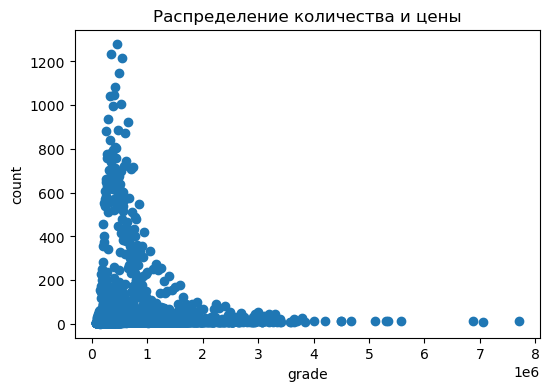

In [20]:
# 1.2 Изучите стоимости недвижимости  
data = df.groupby('price')['grade'].sum().reset_index()
data.head()

plt.figure(figsize=(6, 4))
plt.scatter(data['price'], data['grade'])
plt.title('Распределение количества и цены')
plt.xlabel('grade')
plt.ylabel('count');



In [56]:
#1.3 Изучите распределение квадратуры жилой  


sqft_price = df.groupby('sqft_living').agg({'sqft_lot'}).sort_values('sqft_lot').round(0).head()
sqft_price.reset_index()

plt.bar(df['sqft_living'].value_counts().index, height=df['sqft_lot'].value_counts().values); 

AttributeError: 'SeriesGroupBy' object has no attribute 'sqft_lot'

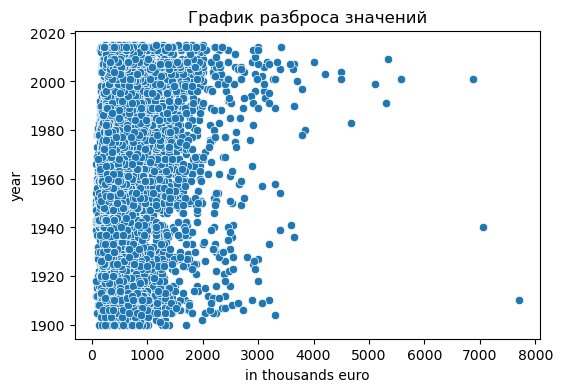

In [ ]:
plt.figure(figsize=(6, 4))

sns.scatterplot(x=df['price'] / 1000, y=df['yr_built'])

plt.title('График разброса значений')
plt.xlabel('in thousands euro')
plt.ylabel('year');

большая часть построек меньше 70 лет


''

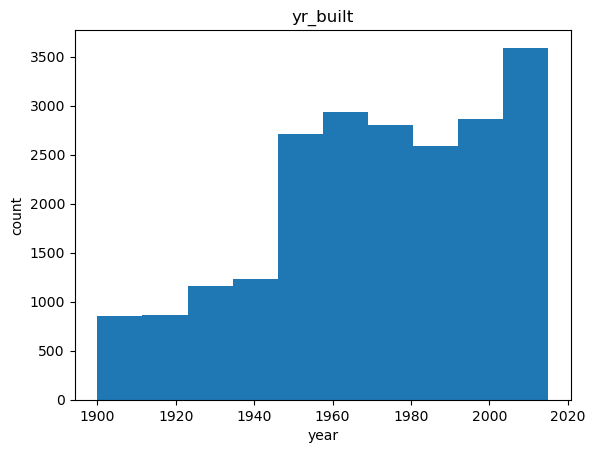

In [12]:
# 2.1.4 Изучите распределение года постройки
print('большая часть построек меньше 70 лет')
plt.hist(df['yr_built'])
plt.title('yr_built') 
plt.xlabel('year')
plt.ylabel('count')
;

***Условие 2: 2 задача***  
2.1 Изучите распределение домов от наличия вида на набережную  
2.2 Изучите распределение этажей домов  
2.2 Изучите распределение состояния домов  
Постройте график
Сделайте выводы  


домов с набережной меньще одного процента


0    21450
1      163
Name: waterfront, dtype: int64

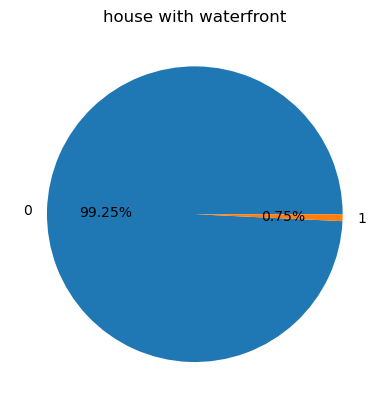

In [10]:
#2.1 Изучите распределение домов от наличия вида на набережную
print('домов с набережной меньще одного процента')
plt.pie(df['waterfront'].value_counts().values, labels=df['waterfront'].value_counts().index, autopct='%.2f%%')
plt.title('house with waterfront')
df['waterfront'].value_counts()

Distribution of floors of houses with an average price.
The price of the building increases proportionately with the number of floors 
more than half of one-story buildings


,floors,price
0,1.0,442181.0
1,1.5,558981.0
2,3.0,582526.0
3,2.0,648891.0
4,3.5,933312.0


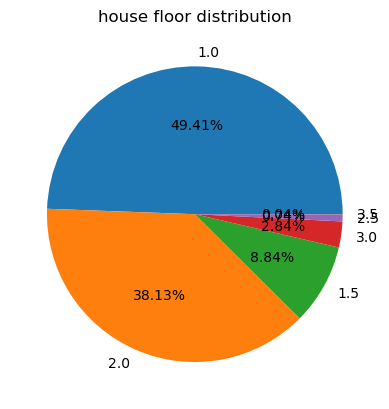

In [7]:
# 2.2 Изучите распределение этажей домов

print('Distribution of floors of houses with an average price.\nThe price of the building increases proportionately with the number of floors \nmore than half of one-story buildings')
plt.pie(df['floors'].value_counts().values, labels=df['floors'].value_counts().index, autopct='%.2f%%');
plt.title('house floor distribution') # название
floors_price = df.groupby('floors').agg({'price': 'mean'}).sort_values('price').round(0).head()
floors_price.reset_index()


в таблице преобладают дома среднего состояния
дома состояния выше среднего сильно отличаются в цене 


,grade,price
0,1,142000.0
1,3,205667.0
2,4,214381.0
3,5,248524.0
4,6,301920.0
5,7,402590.0
6,8,542853.0
7,9,773513.0
8,10,1071771.0
9,11,1496842.0


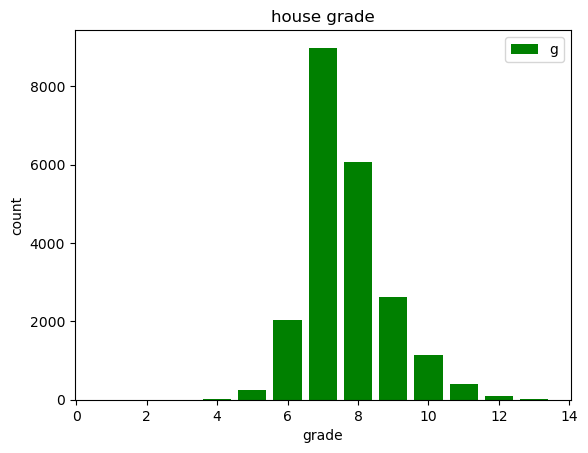

In [8]:
#2.2 Изучите распределение состояния домов

print('в таблице преобладают дома среднего состояния\nдома состояния выше среднего сильно отличаются в цене ')
basic = ('grade') #основной
secondary = ('price')#втричный

lines = df[basic].value_counts().index
colom = df[basic].value_counts().values
plt.bar(lines, height=colom, width=0.8, color='green')
plt.title('house grade') 
plt.xlabel(basic)
plt.ylabel('count')
plt.legend(basic)

table_price = df.groupby(basic).agg({(secondary): 'mean'}).sort_values(basic).round(0)
table_price.reset_index()


***Условие 3: 3 задача***  
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.